EM-ALGORITHM

In [ ]:
import numpy as np
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100

ll_old = 0
for i in range(max_iter):
    ws_A = []
    ws_B = []

    vs_A = []
    vs_B = []

    ll_new = 0

    # E-step: calculate probability distributions over possible completions
    for x in xs:

        # multinomial (binomial) log likelihood
        ll_A = np.sum([x*np.log(thetas[0])])
        ll_B = np.sum([x*np.log(thetas[1])])

        # [EQN 1]
        denom = np.exp(ll_A) + np.exp(ll_B)
        w_A = np.exp(ll_A)/denom
        w_B = np.exp(ll_B)/denom

        ws_A.append(w_A)
        ws_B.append(w_B)

        # used for calculating theta
        vs_A.append(np.dot(w_A, x))
        vs_B.append(np.dot(w_B, x))

        # update complete log likelihood
        ll_new += w_A * ll_A + w_B * ll_B

    # M-step: update values for parameters given current distribution
    # [EQN 2]
    thetas[0] = np.sum(vs_A, 0)/np.sum(vs_A)
    thetas[1] = np.sum(vs_B, 0)/np.sum(vs_B)
    # print distribution of z for each x and current parameter estimate

    print ("Iteration: %d" % (i+1))
    print ("theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new))

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new

Iteration: 1
theta_A = 0.71, theta_B = 0.58, ll = -32.69
Iteration: 2
theta_A = 0.75, theta_B = 0.57, ll = -31.26
Iteration: 3
theta_A = 0.77, theta_B = 0.55, ll = -30.76
Iteration: 4
theta_A = 0.78, theta_B = 0.53, ll = -30.33
Iteration: 5
theta_A = 0.79, theta_B = 0.53, ll = -30.07
Iteration: 6
theta_A = 0.79, theta_B = 0.52, ll = -29.95
Iteration: 7
theta_A = 0.80, theta_B = 0.52, ll = -29.90
Iteration: 8
theta_A = 0.80, theta_B = 0.52, ll = -29.88
Iteration: 9
theta_A = 0.80, theta_B = 0.52, ll = -29.87


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'GMM Classification')

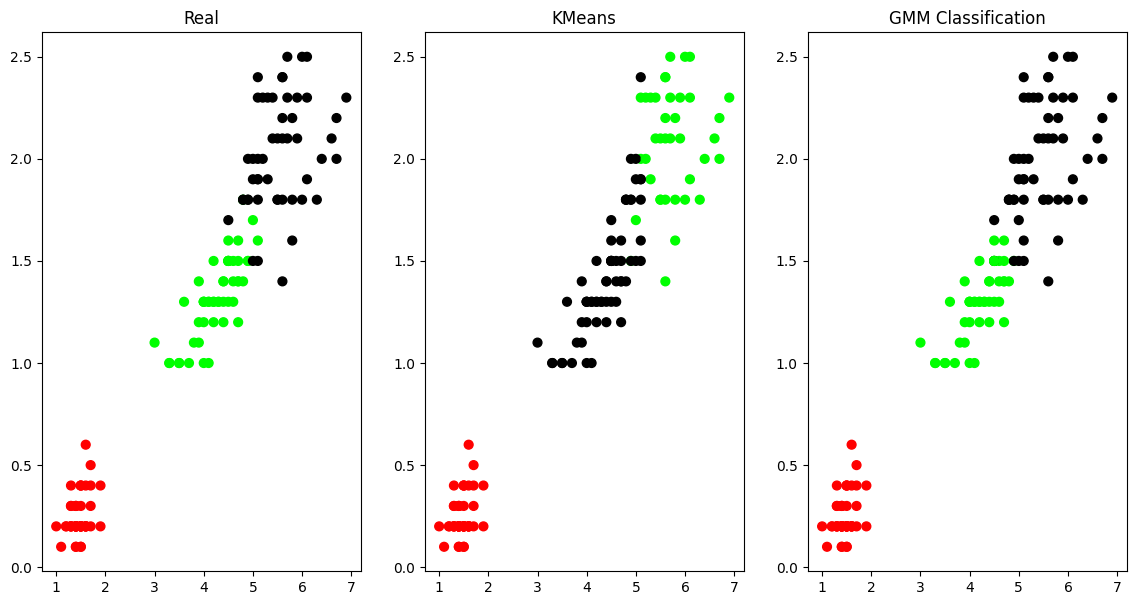

In [18]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=load_iris()
# print(dataset)
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
# print(X)
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

# K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')

# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


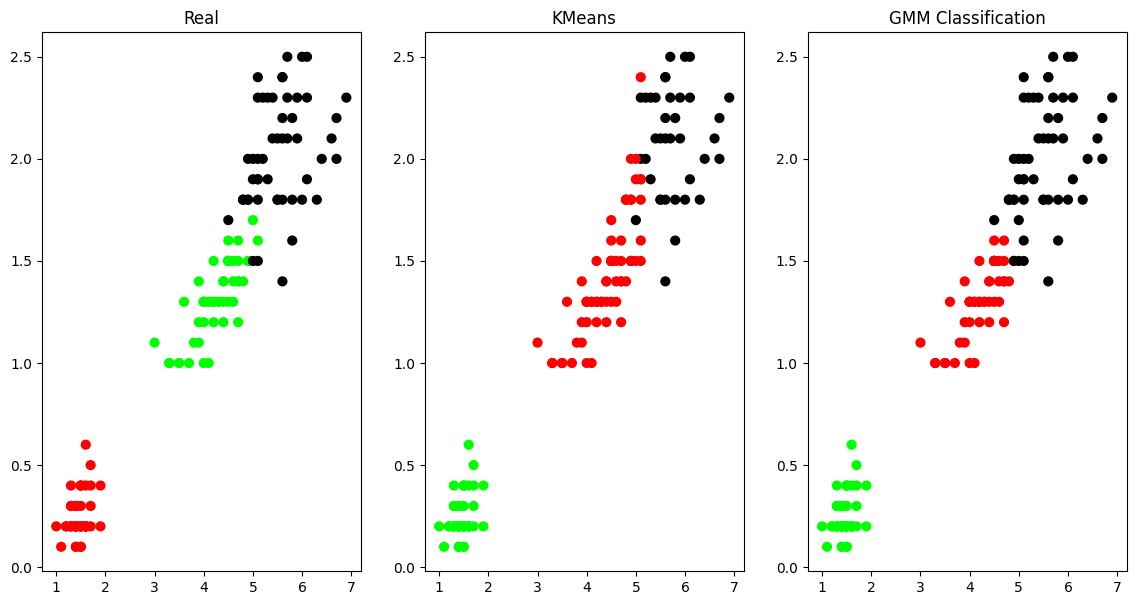

In [28]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Iris dataset from CSV file in Google Drive
path = "/content/drive/MyDrive/ML-LAB-MD/iris.csv"
dataset = pd.read_csv(path)

X = dataset.iloc[:, :4]  # Features: sepal length, sepal width, petal length, petal width
y = dataset.iloc[:, 4]   # Target column

plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])

# REAL PLOT
plt.subplot(1, 3, 1)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=colormap[y], s=40)  # petal length vs petal width
plt.title('Real')

# K-PLOT
plt.subplot(1, 3, 2)
model = KMeans(n_clusters=3)
model.fit(X)
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=colormap[predY], s=40)  # petal length vs petal width
plt.title('KMeans')

# GMM PLOT
# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3],c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')
plt.show()


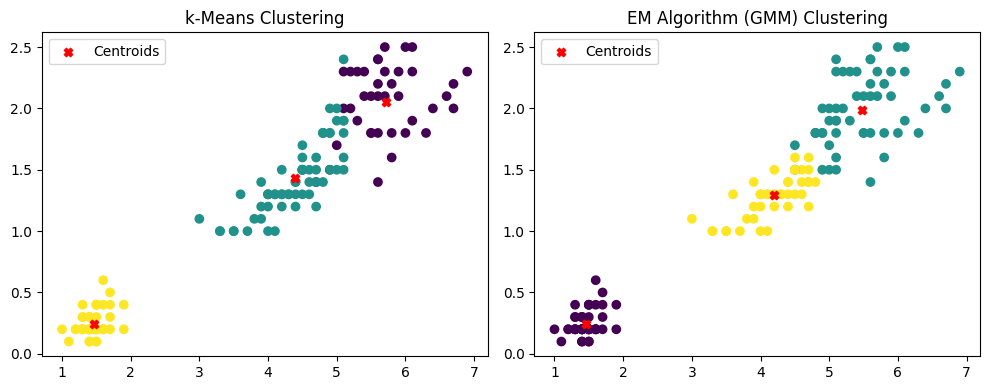

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset from the CSV file
path = "/content/drive/MyDrive/ML-LAB-MD/iris.csv"
data = pd.read_csv(path)

X = data.iloc[:, :-1].values  # Features: sepal length, sepal width, petal length, petal width

def kmeans(X, K, max_iters):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(K):
            centroids[i] = np.mean(X[labels == i], axis=0)

    return labels, centroids

def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    sigma = np.cov(X.T)
    return mu, sigma

def compute_prob(x, mu, sigma):
    d = mu.shape[0]
    inv_sigma = np.linalg.inv(sigma)
    det_sigma = np.linalg.det(sigma)
    exp_term = np.exp(-0.5 * np.dot(np.dot((x - mu), inv_sigma), (x - mu).T))
    return (1 / np.sqrt((2 * np.pi) ** d * det_sigma)) * exp_term

def em_algorithm(X, K, max_iters):
    n, d = X.shape

    # Initialize parameters randomly
    np.random.seed(0)
    pi = np.random.rand(K)
    pi /= np.sum(pi)
    mu = X[np.random.choice(n, K, replace=False), :]
    sigma = np.repeat(np.identity(d)[np.newaxis, :, :], K, axis=0)

    for _ in range(max_iters):
        # E-step: Compute responsibilities
        gamma = np.zeros((n, K))
        for i in range(n):
            for j in range(K):
                gamma[i, j] = pi[j] * compute_prob(X[i], mu[j], sigma[j])
            gamma[i] /= np.sum(gamma[i])

        # M-step: Update parameters
        Nk = np.sum(gamma, axis=0)
        pi = Nk / n
        for j in range(K):
            mu[j] = np.dot(gamma[:, j], X) / Nk[j]
            sigma[j] = np.dot((X - mu[j]).T, np.dot(np.diag(gamma[:, j]), (X - mu[j]))) / Nk[j]

    return np.argmax(gamma, axis=1), mu

# Set the number of clusters and maximum iterations
K = 3
max_iters = 100

# Apply k-Means algorithm
kmeans_labels, kmeans_centroids = kmeans(X, K, max_iters)

# Apply EM algorithm
em_labels, em_centroids = em_algorithm(X, K, max_iters)

# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 2], X[:, 3], c=kmeans_labels)
plt.scatter(kmeans_centroids[:, 2], kmeans_centroids[:, 3], marker='X', color='red', label='Centroids')
plt.title('k-Means Clustering')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=em_labels)
plt.scatter(em_centroids[:, 2], em_centroids[:, 3], marker='X', color='red', label='Centroids')
plt.title('EM Algorithm (GMM) Clustering')
plt.legend()

plt.tight_layout()
plt.show()
